In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

if __name__ == "__main__":
    # 1. Loading test data
    test_data = pd.read_csv('./data/test_data_RNN.csv')

    # Extracting the features and target variables from the testing data
    test_features = test_data.iloc[:, :-1].values
    test_target = test_data.iloc[:, -1].values

    # Performing feature scaling for testing data
    scaler = MinMaxScaler()
    scaled_test_features = scaler.fit_transform(test_features)
    scaled_test_target = scaler.fit_transform(test_target.reshape(-1, 1))

    # Reshaping the features for LSTM input [samples, time steps, features]
    reshaped_test_features = np.reshape(scaled_test_features, (scaled_test_features.shape[0], 1, scaled_test_features.shape[1]))


2023-07-22 21:54:27.401784: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# 2. Load the trained model
model = load_model('models/20941704_train.h5')

# 3. Making predictions on the test data
predictions = model.predict(reshaped_test_features)
predicted_values = scaler.inverse_transform(predictions)

# Calculate the test loss
test_loss = model.evaluate(reshaped_test_features, scaled_test_target)
print(f"Test Loss: {test_loss}")

12/12 [==============================] - 0s 3ms/step - loss: 2.4488e-04
Test Loss: 0.00024488221970386803


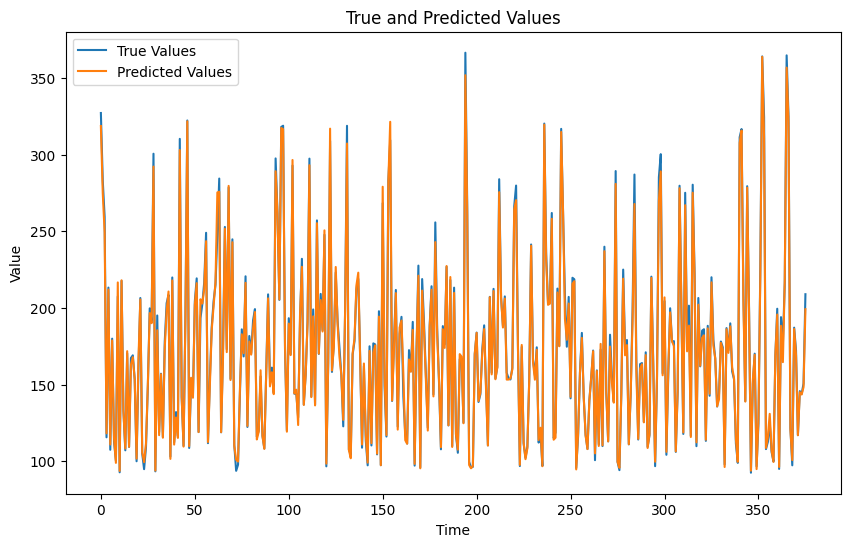

In [3]:

# 4. Plot true and predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_target, label='True Values')
plt.plot(predicted_values, label='Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('True and Predicted Values')
plt.show()